In [1]:
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml, load_iris
from crossValidation import *
import sklearn as sk
from softmax import SoftmaxRegression, GradientDescent, \
    string_to_numerical_categories

<font size="5">Model Accuracy and Algorithm Running Time Using Various Parameters
</font>

In this section we will be studying the effect of the learning rate, momentum and batch size
on the accuracy of our model as well as its effect on the running time of our algorithm. From
class we know that the time to build an optimized model using gradient descent as our
optimizer is highly dependant on the time the former spends to converge to a global minimum. In this
section we want to study the effect of the learning rate, momentum and batch size (in stochastic
gradient descent) on the convergence speed to a global minimum and more generally their effects on
the running time of our algorithm to build our optimized model.

To help us in this task we defined 3 helper functions that will yield different values for the
learning rate, momentum and batch size that we'll use to study the change in accuracy of our model
as well as the running time of our algorithm.

In [2]:
def get_lr(s, inc):
    start = s
    for i in range(1,100):
        start *= inc
        yield start

def get_mom(s, inc):
    start = s
    for i in range(1,101):
        start += inc
        yield start

def get_batch(s, inc):
    start = s
    for i in range(1,30):
        start += inc
        yield start

The main function of this section is "vary_params" that takes as input the parameter we want to vary
(learning rate, momentum or batch size) and fix the other two parameters to their previously found optimal
value. This function also takes a starting value for the parameter we want to vary and an increment
value for this parameter. This function will compute the training and validation accuracy as well as
the running time of our algorithm with respect to the varying parameter. To get more robust results
the function runs 5x and an average of the results obtained is plotted onto the graphs to reduce noise
and/or outliers.

In [3]:
def vary_params(self, parameter, opt_mom, opt_lr, opt_batch,
                start, inc, axes):
    params = []
    accuracy_valid = []
    accuracy_train = []
    timer = []
    xlabel = ""
    cv = CrossValidation(self.k, self.d)
    if parameter == 'lr':
        xlabel = "Learning Rate"
        for i, l in enumerate(get_lr(start, inc)):
            params.append(l)
            temp_val = []
            temp_tr = []
            temp_time = []
            for i in range(5):
                if axes != None:
                    plt.xscale('log')
                model = SoftmaxRegression()
                optimizer = GradientDescent(l, max_iters=1e3, epsilon=1e-8,
                                      batch_size=opt_batch, momentum=opt_mom)
                t0 = time.time()
                iter, valid_acc, train_acc = cv.cross_validate_acc(model, optimizer)
                t1 = time.time()
                temp_time.append(t1-t0)
                temp_val.append(valid_acc)
                temp_tr.append(train_acc)
            accuracy_train.append(sum(temp_tr)/5)
            accuracy_valid.append(sum(temp_val)/5)
            timer.append(sum(temp_time)/5)

    elif parameter == 'm':
        xlabel = "Momentum"
        for i, m in enumerate(get_mom(start, inc)):
            params.append(m)
            temp_val = []
            temp_tr = []
            temp_time = []
            for i in range(5):
                model = SoftmaxRegression()
                optimizer = GradientDescent(opt_lr, max_iters=1e3, epsilon=0.1,
                                            batch_size=opt_batch, momentum=m)
                t0 = time.time()
                iter, valid_acc, train_acc = cv.cross_validate_acc(model, optimizer)
                t1 = time.time()
                temp_time.append(t1-t0)
                temp_val.append(valid_acc)
                temp_tr.append(train_acc)
            accuracy_train.append(sum(temp_tr)/5)
            accuracy_valid.append(sum(temp_val)/5)
            timer.append(sum(temp_time)/5)

    elif parameter == 'b':
        xlabel = "Batch size"
        for i, b in enumerate(get_batch(start, inc)):
            params.append(b)
            size = int(len(self.d) * (b/100))
            temp_val = []
            temp_tr = []
            temp_time = []
            for i in range(5):
                model = SoftmaxRegression()
                optimizer = GradientDescent(opt_lr, max_iters=1e3, epsilon=1e-8,
                                            batch_size=size, momentum=opt_mom)
                t0 = time.time()
                iter, valid_acc, train_acc = cv.cross_validate_acc(model, optimizer)
                t1 = time.time()
                temp_time.append(t1-t0)
                temp_val.append(valid_acc)
                temp_tr.append(train_acc)
            accuracy_train.append(sum(temp_tr)/5)
            accuracy_valid.append(sum(temp_val)/5)
            timer.append(sum(temp_time)/5)

    plot_accuracy(params, accuracy_valid, accuracy_train, xlabel)
    plot_time(params, timer, xlabel, axes)

The following two helper functions plot the training and validation accuracy of our model
with respect to the chosen varying parameter as well the running time of our algorithm with
respect to the same parameter.

In [4]:
def plot_accuracy(params, accuracy_valid, accuracy_train, xlabel):
    plt.ylim(0, 1)
    plt.plot(params, accuracy_valid, label='validation accuracy')
    plt.plot(params, accuracy_train, label='training accuracy')
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")
    plt.show()
def plot_time(x_axis, y_axis, x_name, axes):
    if axes != None:
        plt.xscale('log')
    plt.plot(x_axis, y_axis, label='Time vs parameter')
    # plt.errorbar(params, np.mean(accuracy, axis=1), np.std(accuracy, axis=1), label='validation')
    plt.legend()
    plt.xlabel(x_name)
    plt.ylabel("Time")
    plt.show()

<font size="4">DIGITS DATASET</font>

Our first case study will be on the digits dataset (found here: https://scikit-learn.org/
stable/modules/generated/sklearn.datasets.load_digits.html). We'll study the effect of the learning
rate, momentum and batch size on the accuracy of the prediction produce by softmax regression as
well as the effect on the time spent to build this model.


In [5]:
    digits = sk.datasets.load_digits()
    cv = CrossValidation(5, digits)

<font size="3">Learning rate effect: </font>

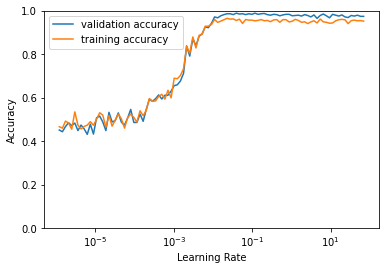

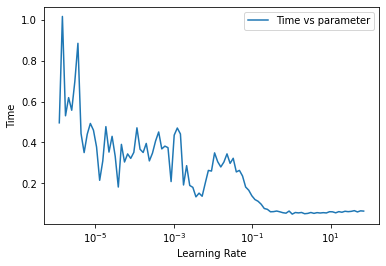

In [13]:
    vary_params(cv, 'lr', 0.5, 0.01, 20, 1e-6, 1.2, "log")

**Plot 1: Learning rate vs Accuracy for the digits dataset**<br>
**Plot 2: Learning rate vs Time for the digits dataset**

<font size="3">Momentum effect: </font>

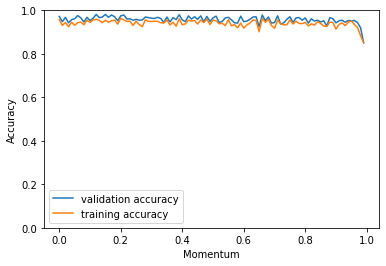

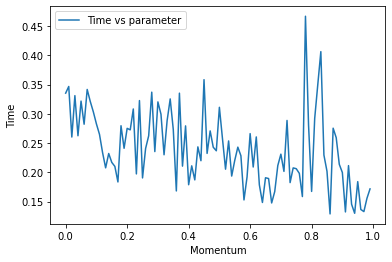

In [14]:
    vary_params(cv, 'm', 0.5, 0.01, 20, -0.01, 0.01, None)

**Plot 3: Momentum vs Accuracy for the digits dataset**<br>
**Plot 4: Momentum vs Time for the digits dataset**

<font size="3">Batch size effect: </font>

/Users/admin/Desktop/softmax_regression/softmax.py:89: RuntimeWarning: invalid value encountered in true_divide
  new_w = np.dot(x.T, yh - y) / x.shape[0]


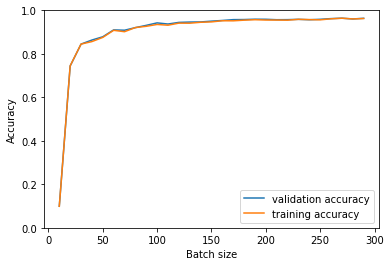

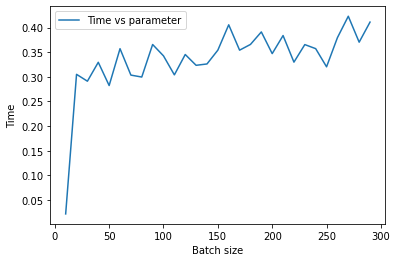

In [8]:
    vary_params(cv, 'b', 0.5, 0.01, 20, 0, 10, None)

**Plot 5: Batch size vs Accuracy for the digits dataset**<br>
**Plot 6: Batch size vs Time for the digits dataset**

<font size="4">IRIS DATASET</font>

Our second case study will be on the iris dataset from openml (found here: https://www.openml.org/d/61).
We'll study the effect of the learning rate, momentum and batch size on the accuracy of the prediction produce
by softmax regression as well as the effect on the time spent to build this model.

In [9]:
    iris = fetch_openml(name='iris')
    iris['target'] = string_to_numerical_categories(iris['target'])
    cv = CrossValidation(5, iris)

/Users/admin/pythonProject/lib/python3.8/site-packages/sklearn/datasets/_openml.py:373: UserWarning: Multiple active versions of the dataset matching the name iris exist. Versions may be fundamentally different, returning version 1.
  warn("Multiple active versions of the dataset matching the name"


<font size="3">Learning rate effect: </font>

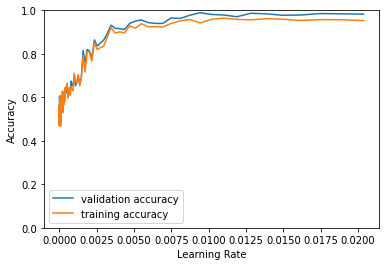

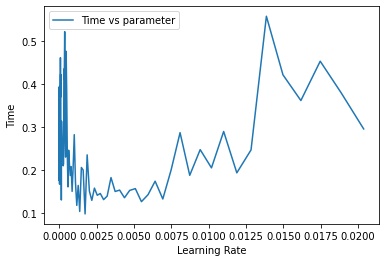

In [15]:
    vary_params(cv, 'lr', 0.25, 0.1, 10, 1e-5, 1.08, None)

**Plot 7: Learning rate vs Accuracy for the iris dataset**<br>
**Plot 8: Learning rate vs Time for the iris dataset**

<font size="3">Momentum effect: </font>

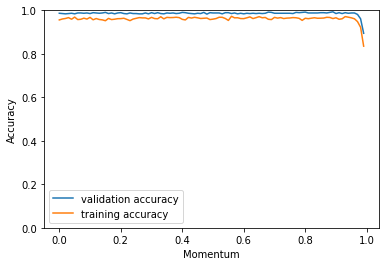

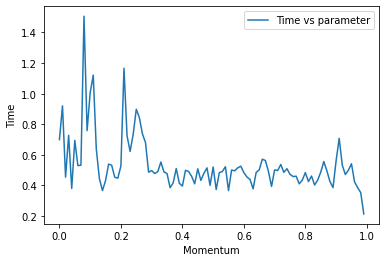

In [17]:
    vary_params(cv, 'm', 0.25, 0.1, 10, -0.01, 0.01, None)

**Plot 9: Momentum vs Accuracy for the iris dataset**<br>
**Plot 10: Momentum rate vs Time for the iris dataset**

<font size="3"> Batch size effect: </font>

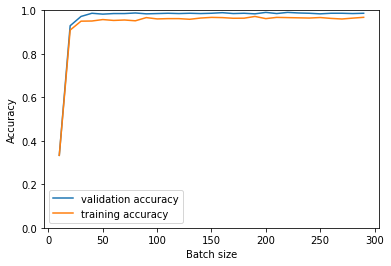

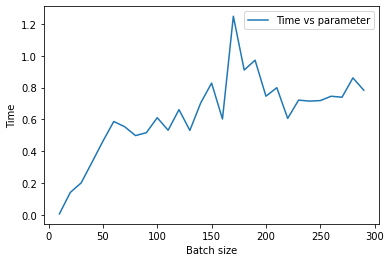

In [12]:
    vary_params(cv, 'b', 0.25, 0.1, 10, 0, 10, None)

**Plot 11: Batch size vs Accuracy for the iris dataset**<br>
**Plot 12: Batch size vs Time for the iris dataset**
